### **Assignment**

**Problem statement**

Use the following state diagram:


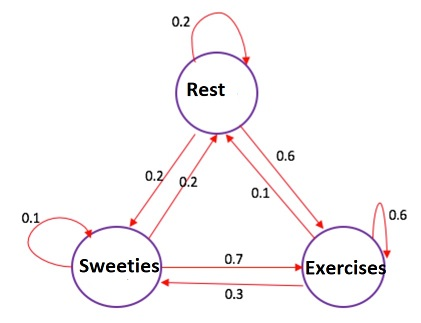
1. The starting state is Rest. Calculate the probability of possible activity on the 15th day.
2. What about the state and probability after 10000 days?
3. What do you observe from the above two?


In [37]:
import numpy as np

# Before we proceed with parts 1, 2, and 3, we need to implement some features.

# So, this is the state diagram with transition probabilities.
# First there are transition probabilities from Rest.
# Then there are transition probabilities from Exerices.
# In the end there are transition probabilities from Sweeties.
transition_matrix = np.array([[0.2, 0.2, 0.6],
                             [0.2, 0.1, 0.7],
                             [0.1, 0.3, 0.6]])

# Now we should define the activities corresponding to each state
activities = ['Rest', 'Exercises', 'Sweeties']

# This is the function which predicts the activity on the n-th day
def predict_activity(n):
    # Starting from the Rest state
    current_state = 0
    # Proceeding further
    for i in range(n):
        transition_probability = transition_matrix[current_state]
        current_state = np.random.choice([0, 1, 2], p = transition_probability)
    # Returning the index of the predicted activity in the end
    return current_state

# This is the function for finding the probability of activity on the n-th day
def calculate_activity_probability(n, start_state, end_state):
    # Using the start state (Rest in our case) and the probability of 1.0
    current_state = start_state
    probability = 1.0
    # This function iterates n times, multiplying the probabilities of
    # transitioning to the end_state at each step.
    for i in range(n):
        transition_probability = transition_matrix[current_state]
        probability *= transition_probability[end_state]
        current_state = np.random.choice([0, 1, 2], p = transition_probability)
    # Returning the accumulated probability.
    return probability


1. To calculate the probability of possible activity on the 15th day, we can use previously implemented functions, predict_activity and calculate_activity_probability. First we are going to find the predicted activity on the 15th day and then we are going to see the probability.


In [78]:
n = 15
predicted_activity_index = predict_activity(n)
predicted_activity = activities[predicted_activity_index]
probability = calculate_activity_probability(n, 0, predicted_activity_index)
print(f"On day {n}, the predicted activity is {predicted_activity} with probability {probability}")

On day 15, the predicted activity is Exercises with probability 7.085879999999998e-10


2. For the state and probability after 10000 days, we can apply the procedure from the first part, just n will be 1000 now. The function is called to calculate the probability of reaching the end state (which is found using the predict_activity function) on the 1000th day starting from the Rest state.

In [77]:
n = 1000
predicted_activity_index = predict_activity(n)
predicted_activity = activities[predicted_activity_index]
probability = calculate_activity_probability(n, 0, predicted_activity_index)
print(f"On day {n}, the predicted state is {predicted_activity} with probability {probability}")

On day 1000, the predicted activity is Sweeties with probability 7.725877028965256e-206


3. From these two we can observe that the probability of a specific activity or state depends on the transition probabilities between states. So, when n increases, the transition probabilities are having a higher likelihood of transitioning to a different state, which meanaas the probability of the desired activity decreases.